O KNN é um algoritmo de ML para encontrar grupos de usuários semelhantes com base em classificações comuns de livros e fazer previsões usando a classificação média dos principais vizinho mais próximos

# Importando as bibliotecas 

In [1]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
import numpy as np
import datetime
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="white")
#sns.set(font_scale=1.5)

In [2]:
ratings = pd.read_csv('E:/tcc/movielens/ratings.csv', sep=',')
movies = pd.read_csv('E:/tcc/movielens/movies.csv', sep=',')

In [3]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Fazendo merge dos DataFrames

Para garantir significância estatística, veremos apenas os livros populares Para descobrir quais livros são os livros populares precisamos combinar livros com dados de classificação

In [5]:
df = pd.merge(ratings, movies, on='movieId')

In [6]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,307,3.5,1256677221,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
1,6,307,4.0,832059248,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
2,56,307,4.0,1383625728,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
3,71,307,5.0,1257795414,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
4,84,307,3.0,999055519,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27753444 entries, 0 to 27753443
Data columns (total 6 columns):
userId       int64
movieId      int64
rating       float64
timestamp    int64
title        object
genres       object
dtypes: float64(1), int64(3), object(2)
memory usage: 1.4+ GB


# Criando gráfico sobre Notas

Text(0.5, 1.0, 'Quantidade de avaliação por nota')

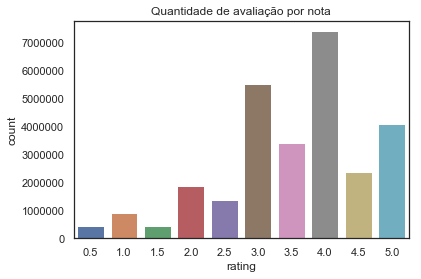

In [8]:
ax = sns.countplot(df['rating'])
ax.set_title("Quantidade de avaliação por nota")
#plt.savefig('count-values-rating.png', dpi=300)

In [9]:
#df.rating.value_counts()

In [10]:
total_ratings = df['movieId'].value_counts()
df = df.set_index('movieId')
df['total_ratings'] = total_ratings

In [11]:
#total_ratings

In [12]:
movies = movies.set_index('movieId')
movies['total_ratings'] = total_ratings

In [13]:
df = df.reset_index()

In [14]:
df.head()

,movieId,userId,rating,timestamp,title,genres,total_ratings
0,307,1,3.5,1256677221,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama,7958
1,307,6,4.0,832059248,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama,7958
2,307,56,4.0,1383625728,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama,7958
3,307,71,5.0,1257795414,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama,7958
4,307,84,3.0,999055519,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama,7958


In [15]:
df.sort_values(by='total_ratings', ascending=False).head()

,movieId,userId,rating,timestamp,title,genres,total_ratings
2013175,318,118214,4.0,948305097,"Shawshank Redemption, The (1994)",Crime|Drama,97999
2004965,318,94333,4.0,1075825476,"Shawshank Redemption, The (1994)",Crime|Drama,97999
2004956,318,94310,4.0,1535831009,"Shawshank Redemption, The (1994)",Crime|Drama,97999
2004957,318,94313,4.0,1002118866,"Shawshank Redemption, The (1994)",Crime|Drama,97999
2004958,318,94317,5.0,1386875907,"Shawshank Redemption, The (1994)",Crime|Drama,97999


# Limiar

In [16]:
mediana_total_ratings = df['total_ratings'].median()

In [17]:
mediana_total_ratings

10633.0

In [18]:
media_rating = df['rating'].mean()
media_rating

3.5304452124932677

In [19]:
df = df.query('total_ratings >= @mediana_total_ratings')

In [20]:
df = df.query('rating >= @media_rating')

In [21]:
df = df.reset_index()
df = df.drop(columns=['index'])
df.head()

,movieId,userId,rating,timestamp,title,genres,total_ratings
0,1221,3,4.0,945141407,"Godfather: Part II, The (1974)",Crime|Drama,38875
1,1221,15,4.0,1370809477,"Godfather: Part II, The (1974)",Crime|Drama,38875
2,1221,73,5.0,1437671653,"Godfather: Part II, The (1974)",Crime|Drama,38875
3,1221,88,5.0,1208454502,"Godfather: Part II, The (1974)",Crime|Drama,38875
4,1221,95,4.5,1086970047,"Godfather: Part II, The (1974)",Crime|Drama,38875


In [22]:
movies.sort_values('total_ratings', ascending=False).head()

,title,genres,total_ratings
movieId,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,97999.0
356,Forrest Gump (1994),Comedy|Drama|Romance|War,97040.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,92406.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,87899.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,84545.0


In [23]:
nota_media = ratings.groupby('movieId').mean()['rating']

In [24]:
movies['nota_media'] = nota_media

# Recomendação COLD START

In [25]:
movies.query("total_ratings >= @mediana_total_ratings").sort_values('nota_media', ascending=False).head(10)

,title,genres,total_ratings,nota_media
movieId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,97999.0,4.424188
858,"Godfather, The (1972)",Crime|Drama,60904.0,4.332893
50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,62180.0,4.291959
1221,"Godfather: Part II, The (1974)",Crime|Drama,38875.0,4.263035
527,Schindler's List (1993),Drama|War,71516.0,4.257502
2019,Seven Samurai (Shichinin no samurai) (1954),Action|Adventure|Drama,14578.0,4.254116
1203,12 Angry Men (1957),Drama,17931.0,4.237075
904,Rear Window (1954),Mystery|Thriller,22264.0,4.230799
2959,Fight Club (1999),Action|Crime|Drama|Thriller,65678.0,4.230663


In [26]:
movies.query("nota_media >= @media_rating").sort_values('total_ratings', ascending=False).head(10)

,title,genres,total_ratings,nota_media
movieId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,97999.0,4.424188
356,Forrest Gump (1994),Comedy|Drama|Romance|War,97040.0,4.056585
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,92406.0,4.173971
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,87899.0,4.151412
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,84545.0,4.149695
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,81815.0,4.120455
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,76451.0,3.665034
527,Schindler's List (1993),Drama|War,71516.0,4.257502
110,Braveheart (1995),Action|Drama|War,68803.0,4.008481


# Próximos passos, split deve ser feito antes do pivot

In [27]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

In [28]:
df.head()

,movieId,userId,rating,timestamp,title,genres,total_ratings
0,1221,3,4.0,1999-12-14 03:16:47,"Godfather: Part II, The (1974)",Crime|Drama,38875
1,1221,15,4.0,2013-06-09 20:24:37,"Godfather: Part II, The (1974)",Crime|Drama,38875
2,1221,73,5.0,2015-07-23 17:14:13,"Godfather: Part II, The (1974)",Crime|Drama,38875
3,1221,88,5.0,2008-04-17 17:48:22,"Godfather: Part II, The (1974)",Crime|Drama,38875
4,1221,95,4.5,2004-06-11 16:07:27,"Godfather: Part II, The (1974)",Crime|Drama,38875


In [29]:
#df.timestamp.dt.year.value_counts()
df.timestamp.dt.year.max()

2018

In [30]:
treino = df[(df.timestamp >= datetime.datetime(2005,1,1)) & (df.timestamp <= datetime.datetime(2011,12,31))]

In [31]:
teste = df[(df.timestamp >= datetime.datetime(2012,1,1))]

In [32]:
arr_userId_test = teste.userId.unique()
treino = treino[treino['userId'].isin(arr_userId_test)]
arr_userId_treino = treino.userId.unique()
teste = teste[teste['userId'].isin(arr_userId_treino)]

In [33]:
len(treino.userId.unique())

5104

In [34]:
len(teste.userId.unique())

5104

In [35]:
treino_pivot = treino.pivot_table(index='userId', columns='movieId', values='rating').fillna(0)

In [36]:
treino_pivot

movieId,1,2,3,5,6,7,10,11,16,17,...,76251,77561,78499,79132,80463,81591,81834,81845,87232,88125
userId,,,,,,,,,,,,,,,,,,,,,
56,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0
81,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0
295,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,5.0,4.5,0.0,4.5,4.5,0.0,4.0
384,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,...,0.0,0.0,0.0,0.0,4.5,0.0,4.5,0.0,0.0,0.0
604,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
teste_pivot = teste.pivot_table(index='userId', columns='movieId', values='rating').fillna(0)

In [38]:
treino_matrix = csr_matrix(treino_pivot.values)

In [39]:
#treino_matrix

In [272]:
def recomendar_para_usuario(usuario_index):
    #Busca os k vizinhos mais próximos do usuário
    distancias, indices = modelo.kneighbors([treino_pivot.iloc[usuario_index]], n_neighbors=20)
    #usuario mais proximos
    usuario_vizinhos = teste_pivot.iloc[indices[0]]
    filmes = usuario_vizinhos.agg(np.mean).sort_values(ascending=False).head()
    filmes_recomendados = filmes.to_frame()
    filmes_recomendados.rename(columns={0: 'notas'}, inplace=True)
    filmes_recomendados = filmes_recomendados[filmes_recomendados.notas >= 3]
    return movies[movies.index.isin(filmes_recomendados.index)]
    
def treinamento(matrix):
    modelo = NearestNeighbors(n_neighbors=20, algorithm='brute', metric='cosine', n_jobs=-1)
    modelo.fit(matrix)
    return modelo

def notas_do_usuario(usuario):
    notas_do_usuario = teste.query("userId == %d" % usuario)
    notas_do_usuario = notas_do_usuario[["movieId", "rating"]].set_index("movieId")
    return notas_do_usuario

def validacao(usuario_index):
    distancias, indices = modelo.kneighbors([treino_pivot.iloc[usuario_index]])
    usuario_vizinhos = teste_pivot.iloc[indices[0]]
    return usuario_vizinhos.agg(np.mean).sort_values(ascending=False).head()

def filmes_que_acertou(index):
    filmes_que_usuario_viu_no_futuro = teste[teste['userId'] == treino_pivot.iloc[index].name]
    filmes_que_usuario_viu_no_futuro = filmes_que_usuario_viu_no_futuro.set_index('movieId')
    return filmes_que_usuario_viu_no_futuro[filmes_que_usuario_viu_no_futuro.index.isin(filmes_recomendados.index)]

def filmes_que_viu_no_futuro(index):
    return teste[teste['userId'] == treino_pivot.iloc[index].name]

def plot_graf_comparacao(array_real, array_previsao, df_plot):
    df_error = pd.DataFrame()
    df_error['Real'] = array_real
    df_error['Prevista'] = array_previsao
    
    df_error['movieId'] = df_plot.index
    df_error = df_error.set_index('movieId')
    df_error['titulo'] = df_plot['titulo']
    df_error = df_error.set_index('titulo')
    df_error.plot(kind='bar')
    plt.xticks(rotation=45)
    plt.title("Para k = 5")
    plt.ylabel('Nota')
    plt.tight_layout()
    plt.legend(loc=1)
    plt.savefig('plot-comparacaok5.png', dpi=300)
    
def plot_graf_metrics(rmse, mae):
    df_metrics = pd.DataFrame()
    df_metrics['RMSE'] = [rmse]
    df_metrics['MAE'] = [mae]
    df_metrics.plot(kind='bar')
    plt.title('RMSE x MAE')
    plt.ylabel('Valor')
    plt.savefig('plot-metricsk5.png', dpi=300)

def notas_previstas(index):
    notas_previstas = validacao(index)
    notas_previstas = notas_previstas.to_frame()
    notas_previstas.rename(columns={0: 'notas'}, inplace=True)
    notas_previstas = notas_previstas[notas_previstas.notas >= 3]
    notas_previstas = notas_previstas.reset_index()
    notas_previstas = notas_previstas.sort_values(by='movieId')
    return notas_previstas

def notas_reais():
    notas_reais = acertou['rating']
    notas_reais = notas_reais.to_frame()
    notas_reais = notas_reais.reset_index()
    notas_reais = notas_reais.sort_values(by='movieId')
    return notas_reais
    
def normalizar_prev_real(nota_prevista, nota_real):
    arr_movieId_previsao = nota_prevista.movieId.unique()
    nota_real = nota_real[nota_real['movieId'].isin(arr_movieId_previsao)]
    
    arr_movieId_reais = nota_real.movieId.unique()
    nota_prevista = nota_prevista[nota_prevista['movieId'].isin(arr_movieId_reais)]
    
    return nota_prevista, nota_real

In [273]:
modelo = treinamento(treino_matrix)

In [274]:
index = np.random.choice(treino_pivot.shape[0])
index = 501

In [275]:
#index = 

In [276]:
filmes_recomendados = recomendar_para_usuario(index)

In [277]:
filmes_recomendados

,title,genres,total_ratings,nota_media
movieId,,,,
104841,Gravity (2013),Action|Sci-Fi|IMAX,11982.0,3.632741


In [278]:
#iloc pega pelo index (numero da linha) e loc pega por onde onde aquele valor x está
#id_usuario_recomendacao = treino_pivot.iloc[index].name

In [279]:
acertou = filmes_que_acertou(index)

In [280]:
acertou

,userId,rating,timestamp,title,genres,total_ratings
movieId,,,,,,
104841,27915,5.0,2016-05-09 01:24:22,Gravity (2013),Action|Sci-Fi|IMAX,11982


In [281]:
filmes_que_viu_no_futuro(index)

,movieId,userId,rating,timestamp,title,genres,total_ratings
1925137,805,27915,4.5,2013-03-02 02:26:20,"Time to Kill, A (1996)",Drama|Thriller,13931
2170051,1127,27915,4.5,2012-03-04 05:14:21,"Abyss, The (1989)",Action|Adventure|Sci-Fi|Thriller,19492
2974308,1682,27915,4.0,2012-03-04 05:14:43,"Truman Show, The (1998)",Comedy|Drama|Sci-Fi,36016
3135215,1921,27915,4.0,2013-05-24 03:47:14,Pi (1998),Drama|Sci-Fi|Thriller,11000
3994199,3527,27915,4.0,2013-02-14 06:22:09,Predator (1987),Action|Sci-Fi|Thriller,18186
4712040,6378,27915,4.0,2012-11-08 02:37:08,"Italian Job, The (2003)",Action|Crime,14255
5494419,551,27915,4.0,2013-04-20 02:32:01,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical,24134
5887784,2080,27915,4.0,2012-11-08 02:35:41,Lady and the Tramp (1955),Animation|Children|Comedy|Romance,12634
6069632,35836,27915,4.0,2012-03-21 02:47:58,"40-Year-Old Virgin, The (2005)",Comedy|Romance,15332
6145025,59784,27915,4.5,2017-02-09 04:14:36,Kung Fu Panda (2008),Action|Animation|Children|Comedy|IMAX,11540


In [282]:
previsao = notas_previstas(index)

In [283]:
#notas_reais_arr = acertou['rating']
real = notas_reais()

In [284]:
pred, real = normalizar_prev_real(previsao, real)

In [285]:
Y_true = real['rating'].array

In [286]:
Y_pred = pred['notas'].array

In [287]:
from math import sqrt

In [288]:
rmse = sqrt(mean_squared_error(Y_true, Y_pred))
rmse

2.0

In [289]:
mae = mean_absolute_error(Y_true, Y_pred)
mae

2.0

In [ ]:
Y_true

In [ ]:
Y_pred

In [ ]:
df_para_plot = real
df_titulo = movies[movies.index.isin(real.movieId)]
df_para_plot = df_para_plot.set_index('movieId')
df_para_plot['titulo'] = df_titulo['title']

In [ ]:
plot_graf_comparacao(Y_true, Y_pred, df_para_plot)

In [ ]:
plot_graf_metrics(rmse, mae)